# Projektaufgabe zu Modul 3
Zu diesem Notebook: Ich habe zunächst die Aufgaben auf der Kurswebseite bearbeitet (bis auf die Exkurse) und die Beispiele nachvollzogen. Die eigentliche Bearbeitung der Projektaufgabe folgt danach ganz am Ende des Dokuments. 
- Name: Katja Gödde
- Datum: 21.02.2025

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_theme()

In [3]:
df = pd.read_csv("/home/katja/2024-2025-Data_Lirbrarian_Katja_Gödde/Modul_3/data/Library_Usage.csv", dtype={"Within San Francisco County": str}, na_values=['Null', 'NA', ''], low_memory=False)  

In [4]:
df

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,Senior,5,0,75 years and over,Main,Nov,2022.0,Email,True,2015,False
1,Adult,0,0,45 to 54 years,Main,Jul,2023.0,Email,True,2019,False
2,Adult,0,0,55 to 59 years,Western Addition,Mar,2024.0,Email,True,2022,False
3,Welcome,1,1,20 to 24 years,Richmond,Aug,2022.0,Email,True,2022,False
4,Senior,0,0,65 to 74 years,Sunset,Mar,2024.0,Print,False,2023,False
...,...,...,...,...,...,...,...,...,...,...,...
450354,Digital Access Card,0,0,35 to 44 years,Ingleside,NaN,NaN,Email,False,2023,NaN
450355,Digital Access Card,0,0,45 to 54 years,Ingleside,Aug,2022.0,Print,False,2022,NaN
450356,Digital Access Card,0,0,25 to 34 years,Ingleside,Aug,2022.0,Print,False,2022,NaN
450357,Digital Access Card,0,0,35 to 44 years,Ingleside,Apr,2022.0,Print,False,2022,NaN


# 3.1 Häufigkeiten

In [6]:
# Nachvollziehen der Beispiele

In [7]:
df['Age Range'].value_counts()

Age Range
25 to 34 years       95278
35 to 44 years       85669
10 to 19 years       67758
45 to 54 years       49820
0 to 9 years         33180
65 to 74 years       32455
20 to 24 years       27145
75 years and over    20721
55 to 59 years       19735
60 to 64 years       18088
Name: count, dtype: int64

In [8]:
df['Age Range'].value_counts(normalize=True)

Age Range
25 to 34 years       0.211800
35 to 44 years       0.190439
10 to 19 years       0.150624
45 to 54 years       0.110748
0 to 9 years         0.073758
65 to 74 years       0.072146
20 to 24 years       0.060342
75 years and over    0.046062
55 to 59 years       0.043870
60 to 64 years       0.040209
Name: proportion, dtype: float64

In [9]:
age_mode = df['Age Range'].mode()
age_mode[0]

'25 to 34 years'

In [10]:
# Häufigkeitsverteilung für die Variable 'Year Patron Registered'
df['Year Patron Registered'].value_counts(normalize=True)

Year Patron Registered
2023    0.132654
2022    0.115015
2003    0.088927
2021    0.072678
2019    0.072502
2020    0.065870
2017    0.064515
2018    0.062939
2016    0.048117
2015    0.043767
2014    0.033917
2013    0.028750
2012    0.027600
2011    0.026841
2009    0.024580
2010    0.024363
2008    0.021705
2007    0.014033
2006    0.011302
2005    0.010263
2004    0.009661
Name: proportion, dtype: float64

In [11]:
# 2,8% der Kunden wurden im Jahr 2013 registriert. Die meisten Kunden (13,2%) wurden im Jahr 2023 registriert.
# Auffällig ist, dass man fast sagen kann, dass pro Jahr immer mehr Kunden registriert worden sind mit Ausnahme von Jahr 2003.

In [12]:
# Wieviel Prozent der Kunden sind zwischen 25 und 34 Jahren?

In [13]:
df['Age Range'].value_counts(normalize=True)

Age Range
25 to 34 years       0.211800
35 to 44 years       0.190439
10 to 19 years       0.150624
45 to 54 years       0.110748
0 to 9 years         0.073758
65 to 74 years       0.072146
20 to 24 years       0.060342
75 years and over    0.046062
55 to 59 years       0.043870
60 to 64 years       0.040209
Name: proportion, dtype: float64

In [14]:
# 21,18% der Kunden sind zwischen 25 und 34 Jahren.

In [15]:
# Ersetze die fehlenden Werte in der Spalte Age Range durch den Modus dieser Spalte. 

In [16]:
df['Age Range'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
450354    False
450355    False
450356    False
450357    False
450358    False
Name: Age Range, Length: 450359, dtype: bool

In [17]:
df_missing = df.loc[df['Age Range'].isna()]
df_missing

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
2010,Adult,0,0,NaN,Main,May,2021.0,Email,True,2017,False
3603,Digital Access Card,0,0,NaN,Main,Mar,2024.0,Email,True,2019,False
5212,Adult,5,4,NaN,Main,Mar,2024.0,Email,True,2022,False
5523,Adult,0,0,NaN,Main,Feb,2024.0,Email,True,2023,False
6521,Adult,0,0,NaN,Main,Mar,2024.0,Email,True,2018,False
...,...,...,...,...,...,...,...,...,...,...,...
450329,Digital Access Card,0,0,NaN,Glen Park,Aug,2022.0,Print,False,2022,NaN
450331,Digital Access Card,0,0,NaN,Glen Park,Oct,2021.0,Print,False,2021,NaN
450333,Digital Access Card,0,0,NaN,Glen Park,Aug,2021.0,Print,False,2021,NaN
450336,Digital Access Card,0,0,NaN,Bernal Heights,Nov,2023.0,Email,True,2023,NaN


In [18]:
df['Age Range'] = df['Age Range'].fillna(df['Age Range'].mode()[0]) 
df

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,Senior,5,0,75 years and over,Main,Nov,2022.0,Email,True,2015,False
1,Adult,0,0,45 to 54 years,Main,Jul,2023.0,Email,True,2019,False
2,Adult,0,0,55 to 59 years,Western Addition,Mar,2024.0,Email,True,2022,False
3,Welcome,1,1,20 to 24 years,Richmond,Aug,2022.0,Email,True,2022,False
4,Senior,0,0,65 to 74 years,Sunset,Mar,2024.0,Print,False,2023,False
...,...,...,...,...,...,...,...,...,...,...,...
450354,Digital Access Card,0,0,35 to 44 years,Ingleside,NaN,NaN,Email,False,2023,NaN
450355,Digital Access Card,0,0,45 to 54 years,Ingleside,Aug,2022.0,Print,False,2022,NaN
450356,Digital Access Card,0,0,25 to 34 years,Ingleside,Aug,2022.0,Print,False,2022,NaN
450357,Digital Access Card,0,0,35 to 44 years,Ingleside,Apr,2022.0,Print,False,2022,NaN


In [19]:
df['Age Range'].value_counts(normalize=True)

Age Range
25 to 34 years       0.212693
35 to 44 years       0.190224
10 to 19 years       0.150453
45 to 54 years       0.110623
0 to 9 years         0.073675
65 to 74 years       0.072065
20 to 24 years       0.060274
75 years and over    0.046010
55 to 59 years       0.043821
60 to 64 years       0.040164
Name: proportion, dtype: float64

In [20]:
# Die fehlenden Werte wurden durch den Modus (häufigsten Wert ersetzt) und nun beträgt der Prozentanteil der 25-34-jährigen 21,27%. 

In [21]:
# Denkst Du, es handelt sich dabei um eine gute Methode, fehlende Werte zu ersetzen? Welche anderen Strategien fallen Dir ein?

Die Age Range wird etwas dadurch verzerrt, dass die fehlenden Werte alle durch den Modus ersetzt werden. Ich würde es in diesem Fall für sinnvoller halten die fehlenden Werte durch den Median oder das arithmetische Mittel zu ersetzen.

# Aufgabe 3.2 Mittelwert und Median

In [24]:
df['Total Checkouts'].mean()

155.218052709061

In [25]:
df['Total Checkouts'].median()

7.0

Die beiden Werte sind so unterschiedlich, weil es einige wenige Bibliotheksnutzerinnen gibt, die sehr viele Bücher ausleihen. Dadurch wird das arithmetische Mittel in die Höhe getrieben. Der Median ist dagegen immun gegen Ausreißerinnen nach oben oder unten.

In [27]:
# Was ziehst Du daraus für Schlüsse für weitere statistische Analysen und Reports?

Es sollten immer beide Werte betrachtet werden, um identifizieren zu können, ob das arithmetische Mittel durch Ausreißerinnen in die Höhe getrieben wird. 

# Aufgabe 3.4 Varianz

In [30]:
df['Total Checkouts'].var()

276931.23963427445

In [31]:
df['Total Checkouts'].std()

526.2425672959899

In [32]:
# Welche Variable streut mehr: 'Total Checkouts' oder 'Total Renewals'? 
# Vergleiche die Standardabweichungen und den Variationskoeffizienten miteinander.

In [33]:
df['Total Checkouts'].std()

526.2425672959899

In [34]:
df['Total Renewals'].std()

305.91523273880455

In [35]:
cv_total_checkouts = df['Total Checkouts'].std()/df['Total Checkouts'].mean()
cv_total_checkouts

3.390343829930486

In [36]:
cv_total_renewals = df['Total Renewals'].std()/df['Total Renewals'].mean()
cv_total_renewals

3.873868313954441

Es wurde für beide Variablen die Standardabweichung berechnet. Da diese nur schwierig vergleichbar ist, wurde für beide Werte der Variationskoeffizient berechnet, indem die Standardabweichung durch das arithmetische Mittel geteilt wurde. Dadurch sind die Werte vergleichbar: Die Variable Total Renewals hat eine höhere Varianz.

# Aufgabe 3.6 Symmetrie und Schiefe

In [39]:
# Schau Dir die verschiedenen Histogramme im Bild an und charakterisiere jede einzelne Verteilung anhand von Schiefe, Symmetrie und Modus

1) Die Verteilung ist symmetrisch, da der Median und das arithmetische Mittel gleich sind. Dadurch besitzt sie auch keine Schiefe. Die Verteilung ist bimodal, besitzt also zwei Modi (links außen und rechts außen)
2) Die Verteilung ist nicht symmetrisch, sondern rechtsschief. Die Verteilung ist unimodal mit einem Modus rechts außen.
3) Die Verteilung ist nicht symmetrisch, sondern rechtsschief. Die Verteilung ist unimodal mit einem Modus rechts außen.
4) Die Verteilung ist nicht symmetrisch, sondern linksschief. Die Verteilung ist unimodal mit einem Modus links außen.
5) Die Verteilung ist symmetrisch, da der Median und das arithmetische Mittel gleich sind. Dadurch besitzt sie keine Schiefe. Die Verteilung scheint unimodel zu sein, da es einen Wert gibt, der etwas höher zu sein scheint (nicht ganz genau erkenntlich) als alle anderen.
6) Die Verteilung ist nicht symmetrisch, sondern rechtsschief. Die Verteilung ist unimodal mit einem Modus rechts außen.
7) Die Verteilung ist nicht symmetrisch, sondern linksschief. Die Verteilung ist unimodal mit einem Modus links außen.
8) Die Verteilung ist nicht symmetrisch, sondern linksschief. Die Verteilung ist unimodal mit einem Modus links außen.
9) Die Verteilung ist normalverteilt. Sie ist symmetrisch und besitzt dadurch keine Schiefe. Sie ist unimodul mit einem Modus, der dem Mittelwert und Median entspricht.

# Exkurs Korrelation

In [42]:
df['Total Checkouts'].corr(df['Total Renewals'])

0.6421628513121922

In [43]:
# Es besteht eine positive Korrelation zwischen den Ausleihen und den Verlängerungen. 
# Heißt: Kunden, die viel ausleihen, verlängern auch mehr als andere Kunden.

# 3.9 Balkendiagramme bei Fox New

Was fällt Dir an den folgenden Diagrammen von FoxNews auf?
Was würdest Du anders machen?
Welche Botschaft wollten die “Designer” vermutlich vermitteln? Passt die Botschaft mit den Daten zusammen?

Die Botschaft passt nicht mit den Daten zusammen. Das Diagramm beginnt nicht bei 0 und dadurch sieht der Unterschied viel dramatischer aus als er eigentlich ist. Der Diagramm sollte bei 0 beginnen, um die Differenz besser wiederzugeben. 

# Tutorial

In [48]:
# use sample to generate a random subsample
df = pd.read_csv("../data/Library_Usage.csv",low_memory=False,na_values="Null").sample(n=1000)
df

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
41473,Adult,7,0,45 to 54 years,Mission Bay,Jan,2021.0,Email,True,2014,False
130248,Adult,0,0,35 to 44 years,Main,NaN,NaN,Print,False,2023,True
53014,Senior,181,60,65 to 74 years,Chinatown,Mar,2024.0,Email,True,2015,False
440143,Adult,8,9,45 to 54 years,North Beach,Mar,2024.0,Email,True,2022,False
218336,Adult,217,99,45 to 54 years,Eureka Valley,Feb,2021.0,Email,True,2006,True
...,...,...,...,...,...,...,...,...,...,...,...
47565,Adult,0,0,60 to 64 years,Sunset,Mar,2024.0,Email,True,2023,False
56588,Teacher Card,0,0,35 to 44 years,Main,Sep,2022.0,Email,True,2020,True
228285,Adult,5,9,25 to 34 years,Potrero,Mar,2024.0,Email,True,2021,True
278214,Adult,4,6,35 to 44 years,Anza,Jan,2021.0,Email,True,2018,True


In [49]:
# Der erste Plot
sns.relplot(x='Total Checkouts', y='Total Renewals', data=df,
            height=5, aspect=3)

In [50]:
# Plot als Bilddatei abspeichern
plt.savefig('../tutorial.png', dpi=150)

In [51]:
# Farbe und Größe anpassen
sns.relplot(x='Total Checkouts', y='Total Renewals', 
                hue='Provided Email Address', style='Within San Francisco County', 
                size='Year Patron Registered', data=df)

In [52]:
# Anordnung von Zeilen und Spalten
sns.relplot(x='Total Checkouts', y='Total Renewals', 
            size='Year Patron Registered',
            row='Provided Email Address', col='Within San Francisco County', data=df)

In [53]:
# Auswahl einer Farbpalette
sns.relplot(x='Total Checkouts', y='Total Renewals', 
            hue='Provided Email Address', 
            col='Within San Francisco County',
            palette=sns.color_palette('Accent', 2), 
            data=df)

In [54]:
# Balkendiagramme
sns.catplot(y='Year Patron Registered',
            data=df, kind='count', color="steelblue")

In [55]:
sns.catplot(y='Age Range', hue='Provided Email Address', 
            data=df, kind='count')

In [56]:
sns.catplot(x='Patron Type Definition', 
            data=df, kind='count', 
            col='Year Patron Registered', col_wrap=4)

In [57]:
# Histogram
sns.distplot(df['Total Renewals'], kde=False)

/tmp/ipykernel_3074/224025452.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Renewals'], kde=False)


<Axes: title={'center': 'Year Patron Registered = 2023'}, xlabel='Total Renewals', ylabel='count'>

In [58]:
# With density estimation
sns.distplot(df['Total Renewals'], kde=True)

/tmp/ipykernel_3074/3265830921.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Renewals'], kde=True)


<Axes: title={'center': 'Year Patron Registered = 2023'}, xlabel='Total Renewals', ylabel='count'>

In [59]:
# Swarmplot
sns.catplot(x='Year Patron Registered', y = 'Total Renewals',
            data=df, kind='swarm', color="steelblue", aspect=4)

/home/katja/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katja/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katja/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katja/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/katja/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py

In [60]:
# Boxplot
sns.catplot(col='Year Patron Registered', y = 'Total Renewals',
            data=df, kind='box', color="steelblue", aspect=4)

# Eigene Aufgaben (Projektaufgabe)

Aufgabe 1: Erstellung von 2-3 Statistiken

In [132]:
# Erste StatistiK: Berechnung des unteren Quartils für die Spalte 'Total Checkouts'
df['Total Checkouts'].quantile(0.25)

0.0

In [134]:
# Erkenntnis: Min. 25% der Bibliotheksnutzer*innen haben keine Ausleihen getätigt. 

In [146]:
# Zweite Statistik: Erkennung von Ausreißern
df_ausreißer_nach_oben = df[(df['Total Checkouts'] > df['Total Checkouts'].quantile(0.95))]
df_ausreißer

,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
419732,Teen,1280,202,10 to 19 years,Visitacion Valley,Mar,2024.0,Email,True,2008,True
178173,Adult,1481,628,45 to 54 years,Sunset,Mar,2024.0,Email,True,2003,True
213675,Adult,1198,157,55 to 59 years,Merced,Mar,2024.0,Email,True,2003,True
234069,Adult,1834,631,25 to 34 years,Chinatown,Jan,2024.0,Email,True,2005,True
90873,Senior,3002,2925,65 to 74 years,Ortega,Mar,2024.0,Email,True,2003,True
80087,Senior,977,45,65 to 74 years,Chinatown,Feb,2022.0,Print,False,2008,True
371279,Juvenile,1006,349,10 to 19 years,Bernal Heights,Mar,2024.0,Email,True,2015,True
261841,Adult,1577,1789,55 to 59 years,Excelsior,Mar,2024.0,Email,True,2003,True
306253,Adult,971,31,60 to 64 years,Golden Gate Valley,Mar,2024.0,Email,True,2016,True
90659,Senior,1024,366,75 years and over,Ortega,Mar,2024.0,Email,True,2003,True


In [156]:
df_ausreißer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 419732 to 179454
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patron Type Definition        50 non-null     object 
 1   Total Checkouts               50 non-null     int64  
 2   Total Renewals                50 non-null     int64  
 3   Age Range                     50 non-null     object 
 4   Home Library Definition       50 non-null     object 
 5   Circulation Active Month      50 non-null     object 
 6   Circulation Active Year       50 non-null     float64
 7   Notice Preference Definition  50 non-null     object 
 8   Provided Email Address        50 non-null     bool   
 9   Year Patron Registered        50 non-null     int64  
 10  Within San Francisco County   50 non-null     object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 4.3+ KB


In [158]:
df_ausreißer.describe()

,Total Checkouts,Total Renewals,Circulation Active Year,Year Patron Registered
count,50.000000,50.000000,50.000000,50.000000
mean,1872.360000,734.440000,2023.560000,2007.120000
std,813.755134,753.539516,0.951047,4.456777
min,971.000000,31.000000,2019.000000,2003.000000
25%,1199.500000,206.000000,2024.000000,2003.000000
50%,1564.500000,443.500000,2024.000000,2006.000000
75%,2449.500000,958.250000,2024.000000,2010.000000
max,4519.000000,2925.000000,2024.000000,2017.000000


In [162]:
# Erkenntnisse: Die 5% der Bibliotheksnutzer*innen mit den meisten Ausleihen leihen im Durchschnitt 1872 Bücher im Jahr aus. 

Aufgabe 2: Erstellung von 2-3 Grafiken

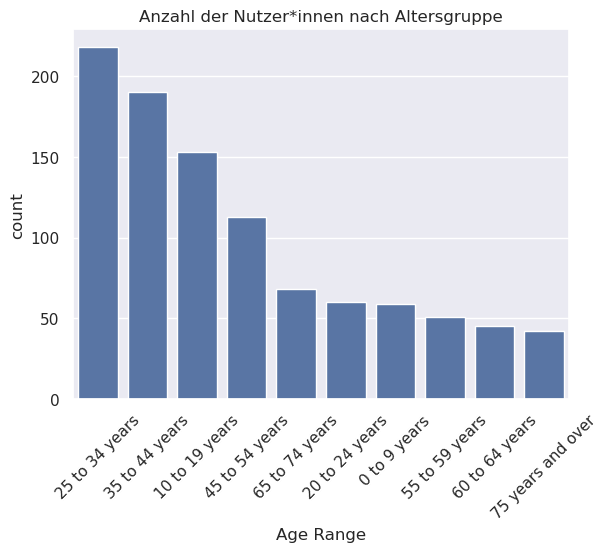

In [168]:
# Die folgende Grafik gibt die Anzahl der Nutzer*inner nach Altersgruppe an

sns.countplot(data=df, x="Age Range", order=df["Age Range"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Anzahl der Nutzer*innen nach Altersgruppe")
plt.show()

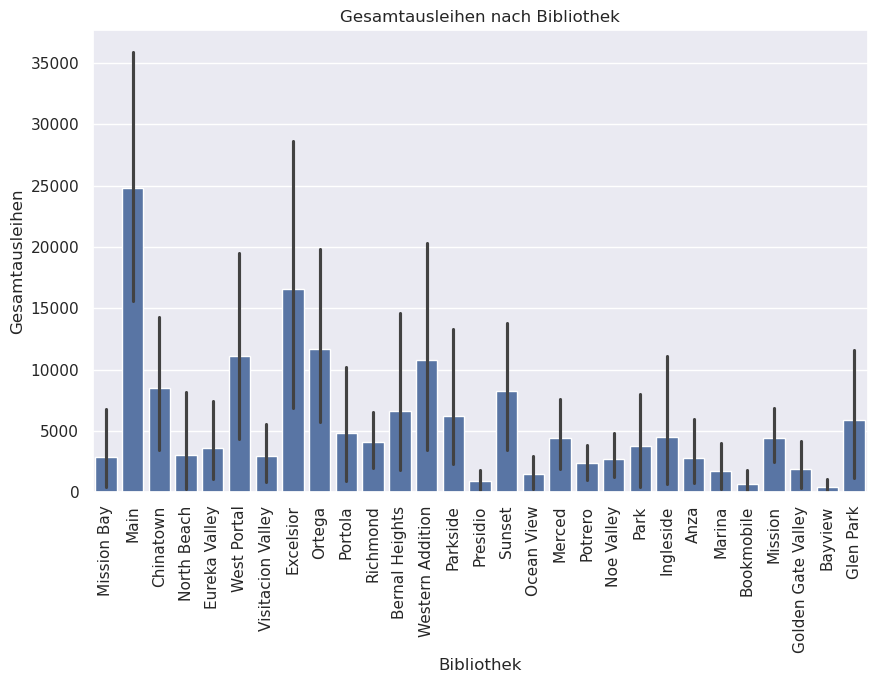

In [176]:
# Die folgende Grafik visualisiert die Gesamtausleihen nach Bibliothek.

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Home Library Definition", y="Total Checkouts", estimator=sum)
plt.xticks(rotation=90)
plt.xlabel("Bibliothek")
plt.ylabel("Gesamtausleihen")
plt.title("Gesamtausleihen nach Bibliothek")
plt.show()

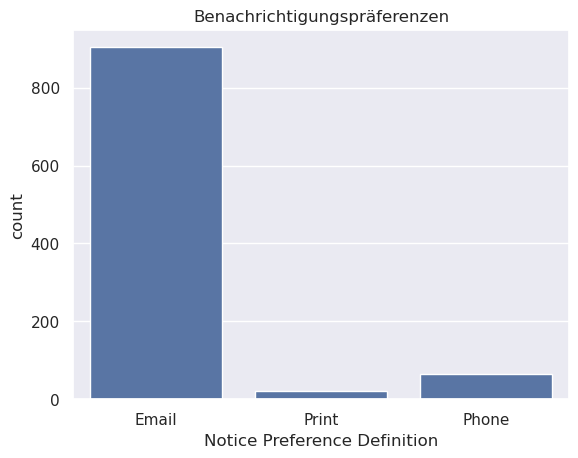

In [180]:
# Die folgende Grafik zeigt die präferierten Benachrichtigungswege

sns.countplot(data=df, x="Notice Preference Definition")
plt.title("Benachrichtigungspräferenzen")
plt.show()